In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('data/Employment_dataset.csv')

In [48]:
df.head()

,CGPA,Internships,Projects,Certifications,Aptitude_Test_ Score,Soft_ Skills_Rating,Extracurricular_Activities,Placement_Training,SSC_Marks,HSC_Marks,Employment_Status
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [49]:
df.shape

(10000, 11)

In [50]:
df.isna().sum()

CGPA                          0
Internships                   0
Projects                      0
Certifications                0
Aptitude_Test_ Score          0
Soft_ Skills_Rating           0
Extracurricular_Activities    0
Placement_Training            0
SSC_Marks                     0
HSC_Marks                     0
Employment_Status             0
dtype: int64

In [51]:
df.duplicated().sum()

72

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CGPA                        10000 non-null  float64
 1   Internships                 10000 non-null  int64  
 2   Projects                    10000 non-null  int64  
 3   Certifications              10000 non-null  int64  
 4   Aptitude_Test_ Score        10000 non-null  int64  
 5   Soft_ Skills_Rating         10000 non-null  float64
 6   Extracurricular_Activities  10000 non-null  object 
 7   Placement_Training          10000 non-null  object 
 8   SSC_Marks                   10000 non-null  int64  
 9   HSC_Marks                   10000 non-null  int64  
 10  Employment_Status           10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [53]:
df.nunique()

CGPA                          27
Internships                    3
Projects                       4
Certifications                 4
Aptitude_Test_ Score          31
Soft_ Skills_Rating           19
Extracurricular_Activities     2
Placement_Training             2
SSC_Marks                     36
HSC_Marks                     32
Employment_Status              2
dtype: int64

In [54]:
df.describe()

,CGPA,Internships,Projects,Certifications,Aptitude_Test_ Score,Soft_ Skills_Rating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [55]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 8 numerical features: ['CGPA', 'Internships', 'Projects', 'Certifications', 'Aptitude_Test_ Score', 'Soft_ Skills_Rating', 'SSC_Marks', 'HSC_Marks']

We have 3 categorical features: ['Extracurricular_Activities', 'Placement_Training', 'Employment_Status']


In [56]:
df.head(2)

,CGPA,Internships,Projects,Certifications,Aptitude_Test_ Score,Soft_ Skills_Rating,Extracurricular_Activities,Placement_Training,SSC_Marks,HSC_Marks,Employment_Status
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed


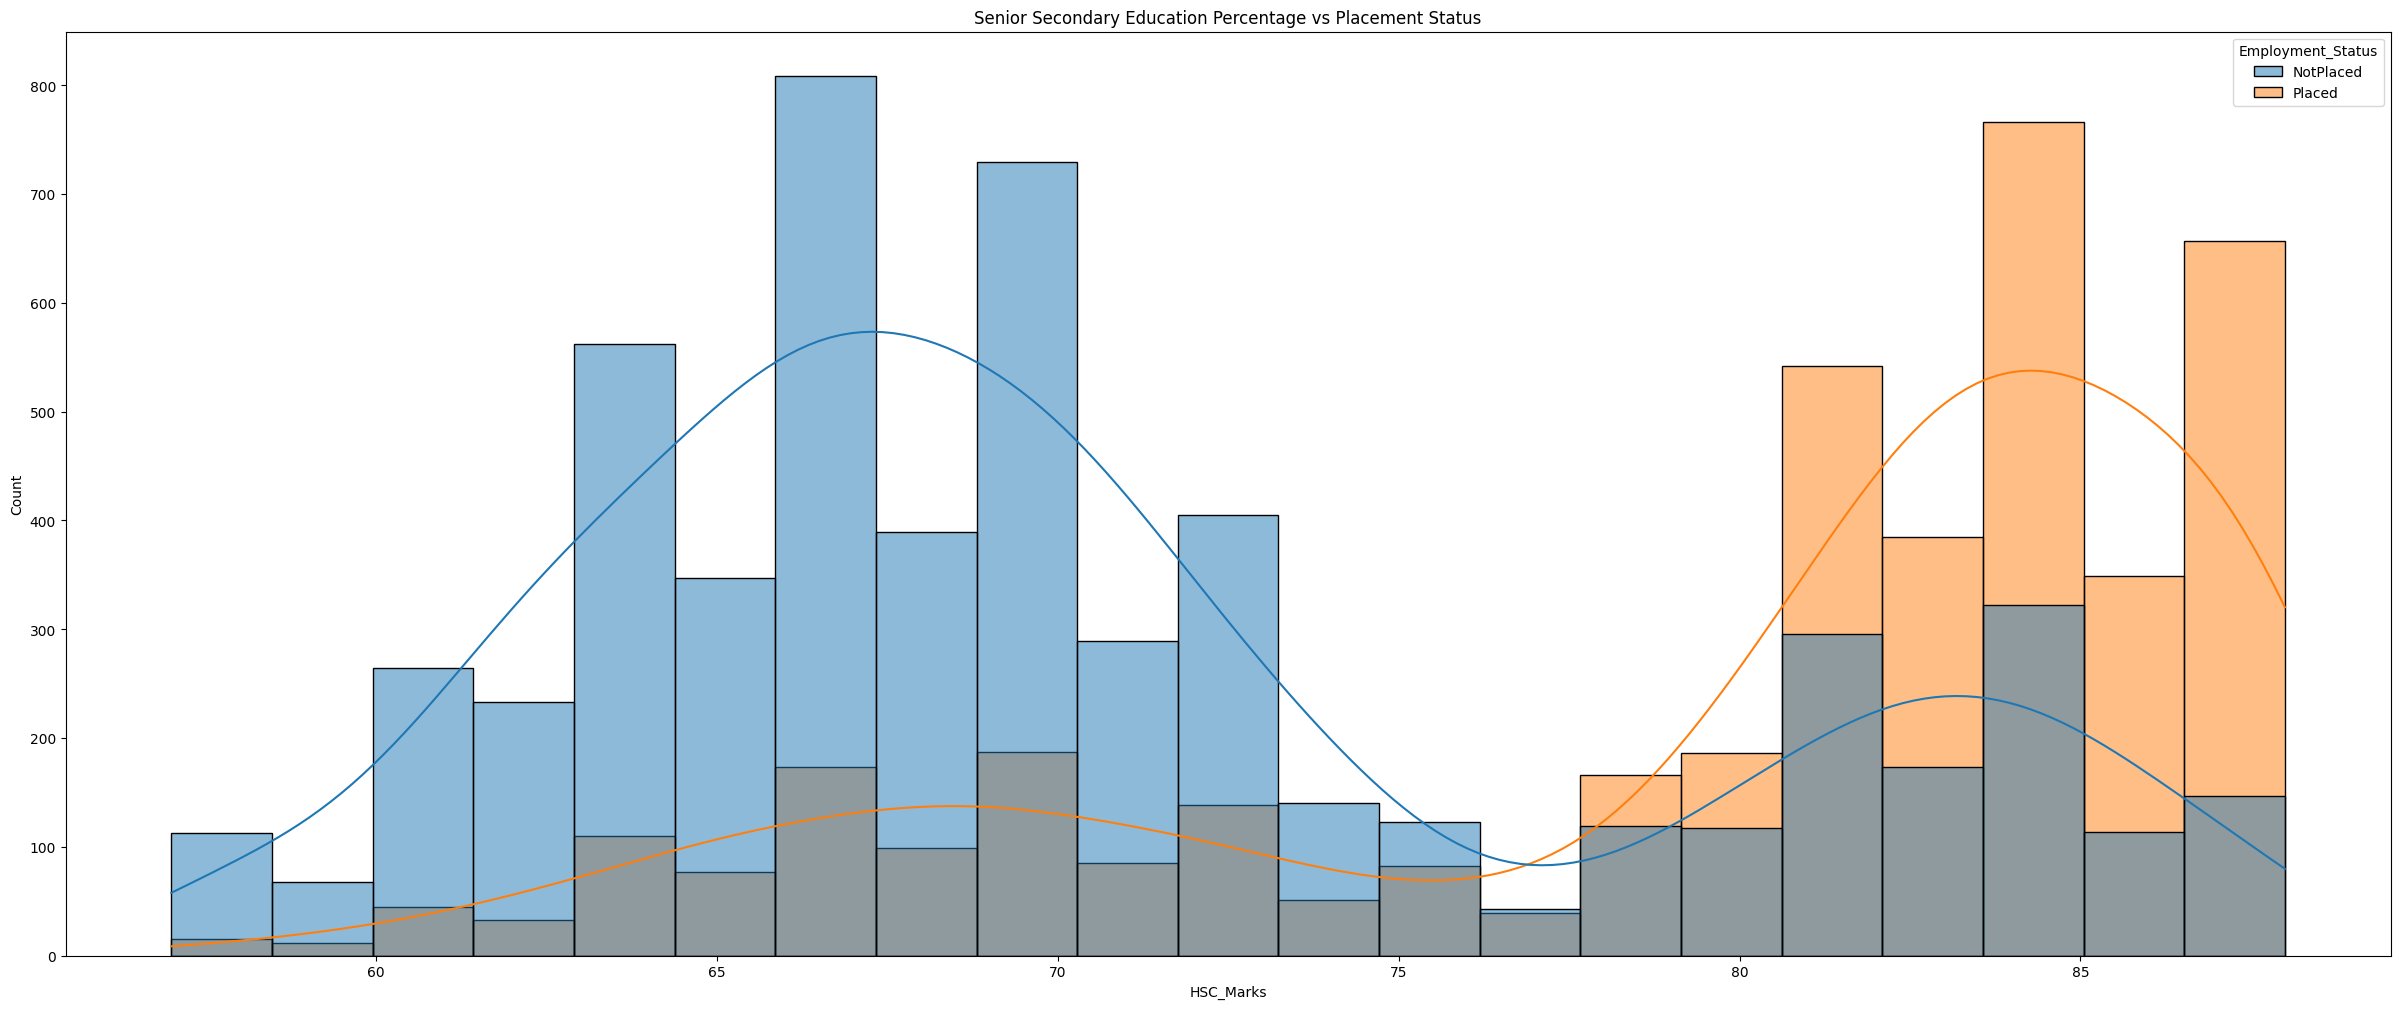

In [57]:
sns.histplot(data=df,x='HSC_Marks',kde=True,hue='Employment_Status')
plt.title('Senior Secondary Education Percentage vs Placement Status')
plt.show()

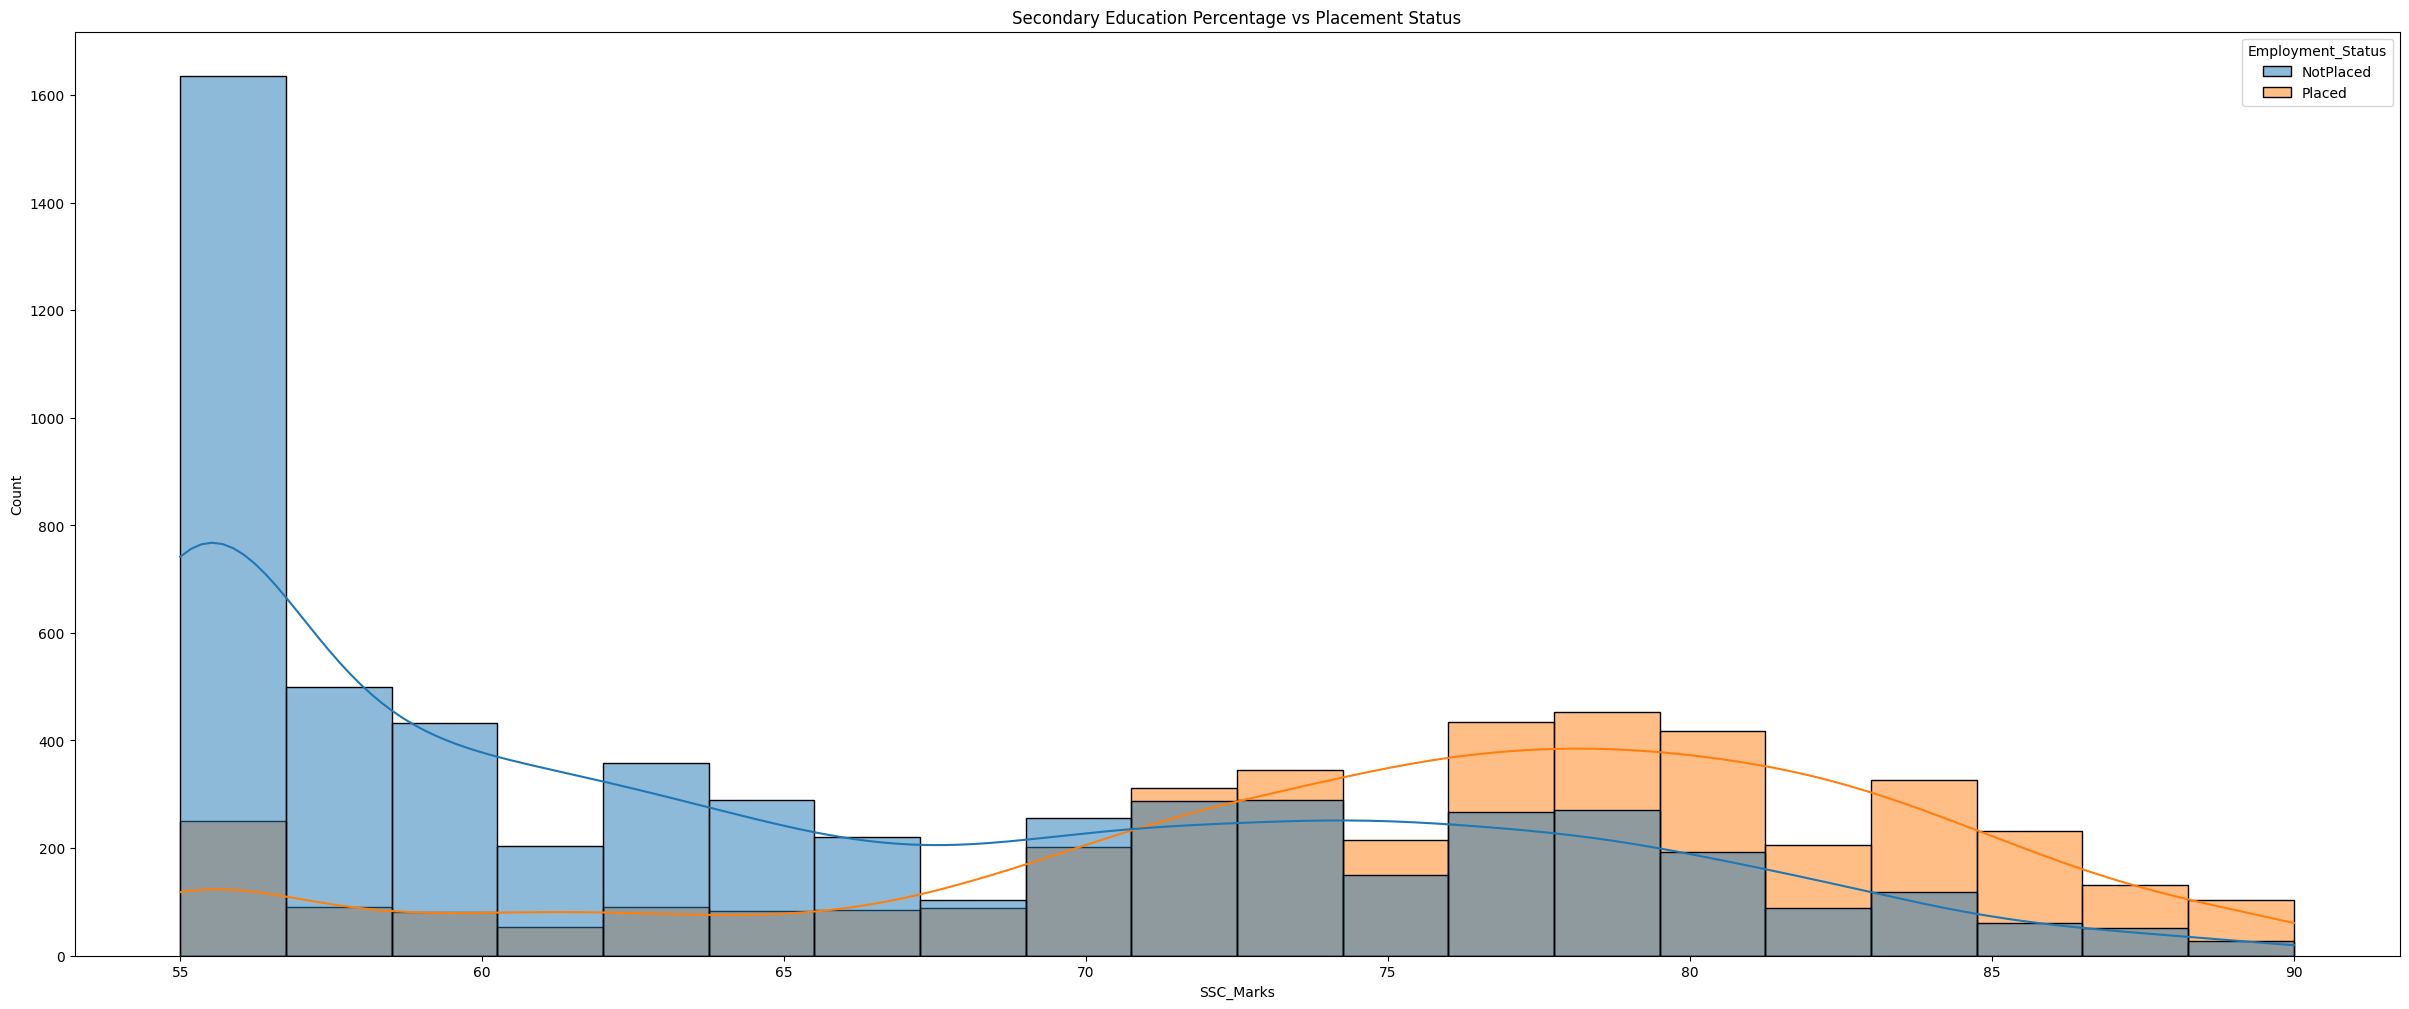

In [58]:
sns.histplot(data=df, x='SSC_Marks', kde=True, hue='Employment_Status')
plt.title('Secondary Education Percentage vs Placement Status')
plt.show()

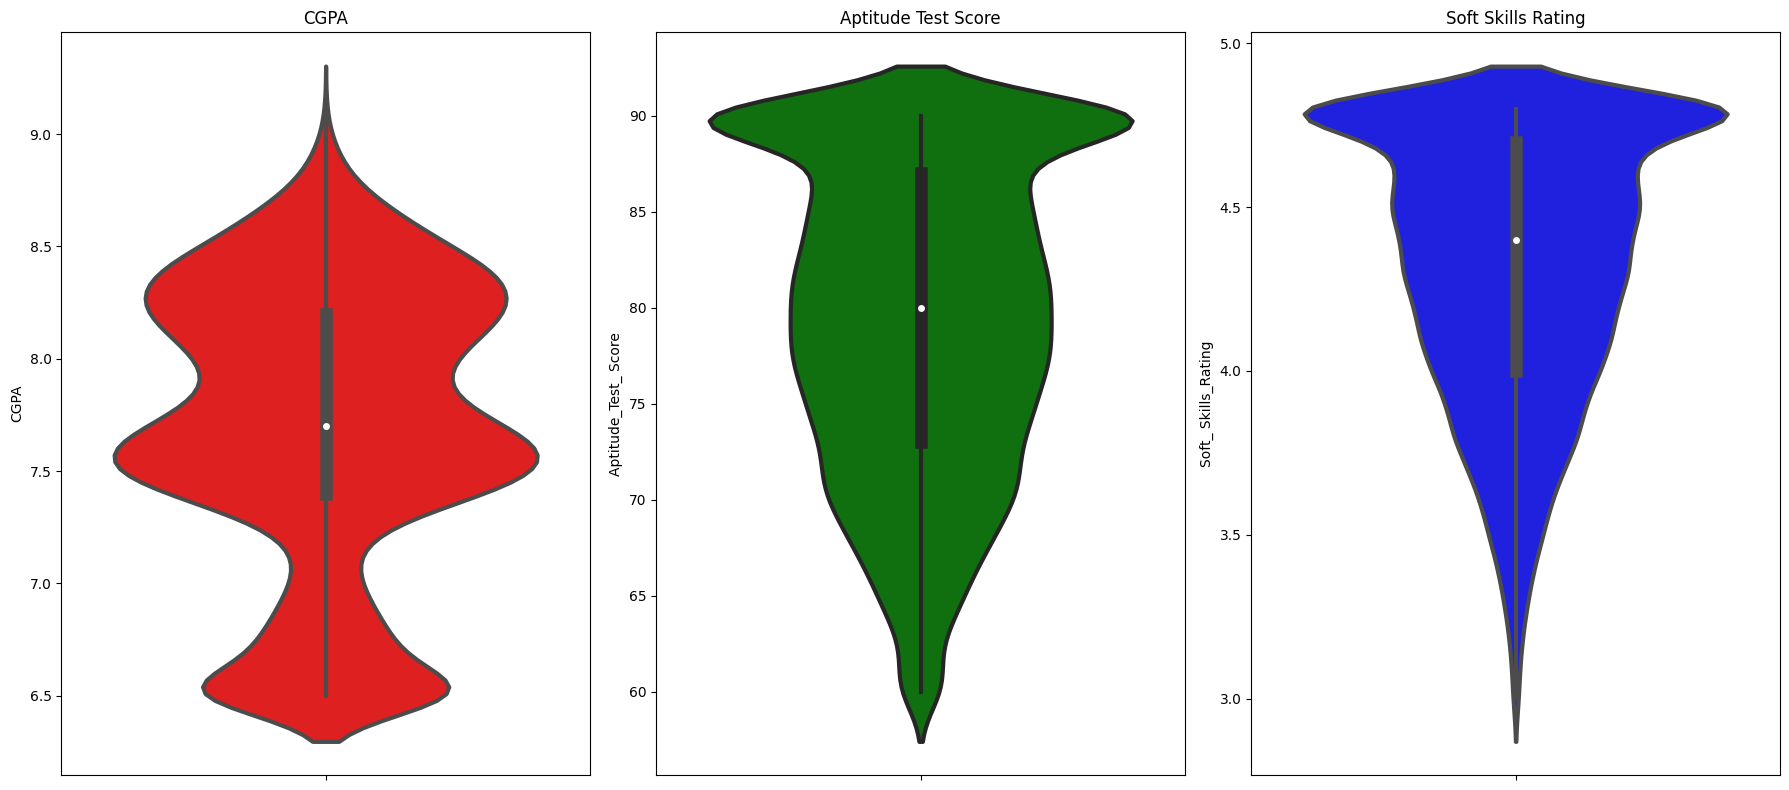

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))

# CGPA
plt.subplot(1, 3, 1)
plt.title('CGPA')
sns.violinplot(y='CGPA', data=df, color='red', linewidth=3)

# Aptitude Test Score
plt.subplot(1, 3, 2)
plt.title('Aptitude Test Score')
sns.violinplot(y='Aptitude_Test_ Score', data=df, color='green', linewidth=3)

# Soft Skills Rating
plt.subplot(1, 3, 3)
plt.title('Soft Skills Rating')
sns.violinplot(y='Soft_ Skills_Rating', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()

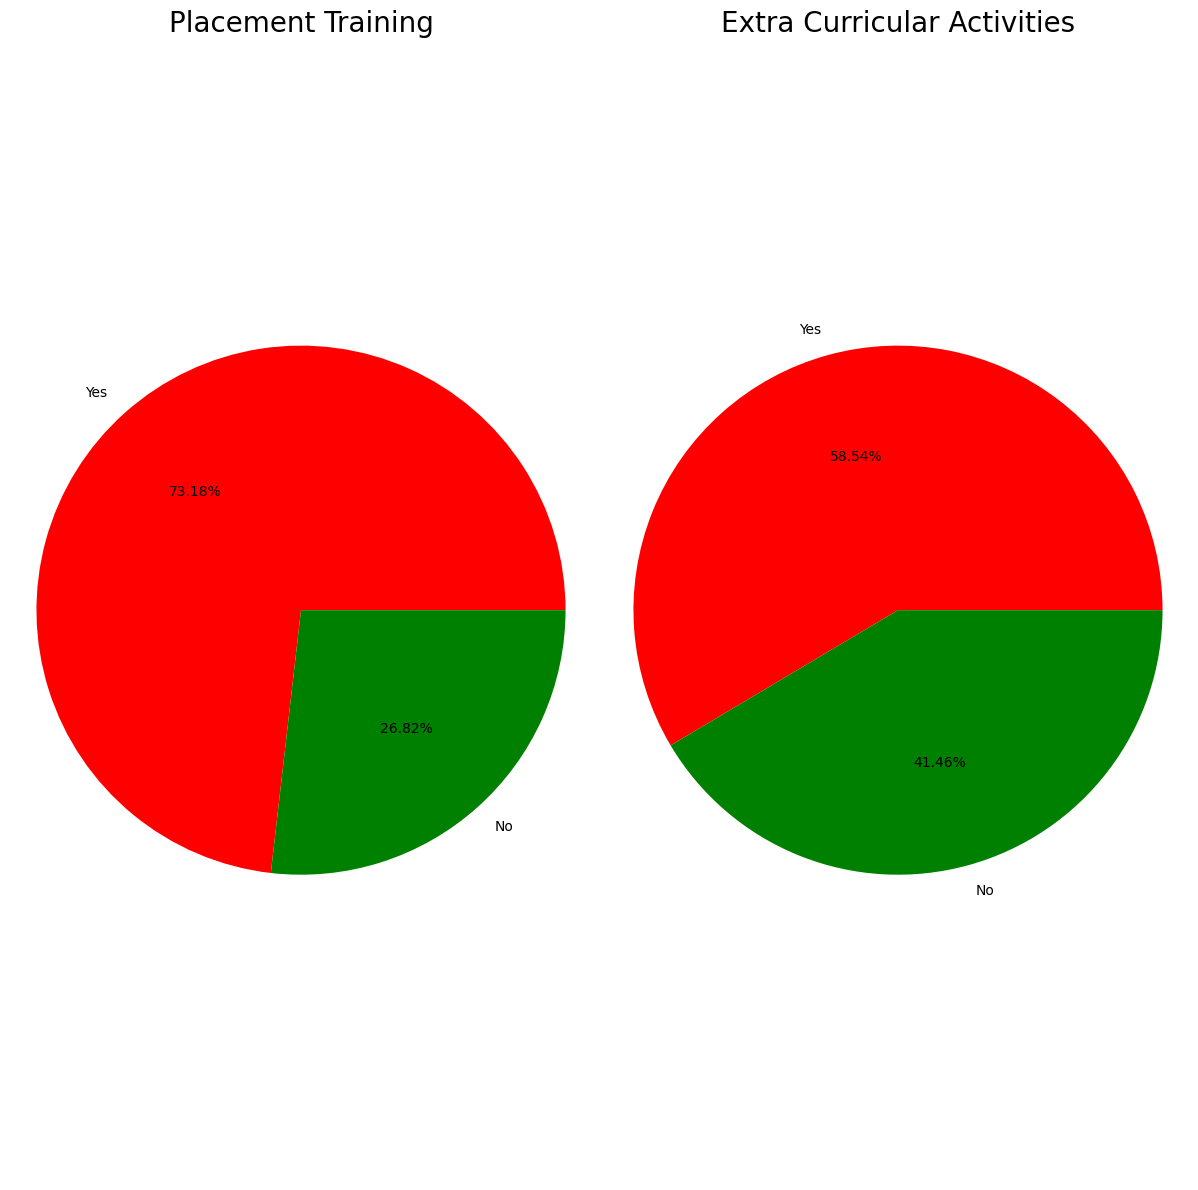

In [60]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Placement_Training'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Placement Training', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 2)
size = df['Extracurricular_Activities'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Extra Curricular Activities', fontsize=20)
plt.axis('equal')

plt.tight_layout()
plt.show()